<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/MNISTCONV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 150s 2ms/step - loss: 0.2671 - accuracy: 0.9183 - val_loss: 0.0545 - val_accuracy: 0.9826
Epoch 2/5
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0864 - accuracy: 0.9749 - val_loss: 0.0418 - val_accuracy: 0.9861
Epoch 3/5
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 4/5
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0535 - accuracy: 0.9842 - val_loss: 0.0317 - val_accuracy: 0.9889
Epoch 5/5
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0367 - val_accuracy: 0.9879


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03673717979356152
Test accuracy: 0.9879000186920166


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predicted_labels = np.argmax(predictions, axis = 1)

In [ ]:
real_labels = np.argmax(y_test, axis = 1)

In [ ]:
import pandas as pd

In [ ]:
compare = pd.DataFrame({'pred':predicted_labels, 'real':real_labels})

In [ ]:
pd.set_option('display.max_rows', 500)
compare[compare['pred'] != compare['real']]

,pred,real
115,9,4
247,6,4
259,0,6
340,3,5
445,0,6
449,5,3
582,2,8
619,8,1
674,3,5
684,3,7


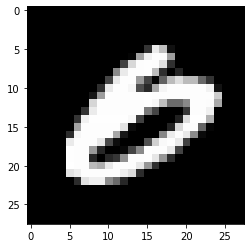

In [ ]:
first_image = x_test[9850]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()